<div>
    <h1><center style="background-color:#C39BD3; color:white;">🏠 Housing Prices in Indian Metropolitan Areas</center></h1>
</div>

<div>
<img src="https://i.imgur.com/Q5IhUpF.gif">
</div>

<div class="alert alert-warning">
<p>Being born and brought up in a metropolitan city, I've witnessed the city develop and the housing prices rise depending on the availability of amenities in a particular region. This was my motivation of putting together a dataset for analysis 😄 <br><br>
Now let's delve into the factors that govern the pricing!
</p>
</div>

<div>  
<h3><center style="background-color:#C39BD3; color:white;"><strong>Importing Libraries 📚</strong></center></h3>
</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import folium
import math
import plotly.graph_objects as go
import plotly.express as px
import eli5
import graphviz
import networkx as nx

from eli5.sklearn import PermutationImportance
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from geopy.geocoders import Nominatim
from sklearn import tree
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots
from string import ascii_letters
from colorama import Fore, Back, Style
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
!pip install geopy 
!pip install Nominatim
!pip install folium

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
  Created wheel for Nominatim: filename=nominatim-0.1-py3-none-any.whl size=2363 sha256=99654ddd6718544a4139260fabde208e3c8313430615e627028404ee1448c14d
  Stored in directory: /root/.cache/pip/wheels/37/00/9e/d904c390bfb174830ad3dcfd62af5544cee7d88bed4f8acedd
Successfully built Nominatim
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


<div>  
<h3><center style="background-color:#C39BD3; color:white;"><strong>Custom Color Palette 🎨</strong></center></h3>
</div>

In [3]:
custom_colors = ["#4e89ae", "#c56183","#ed6663","#ffa372"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))

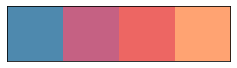

In [4]:
sns.palplot(sns.color_palette(custom_colors),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

<center style="background: #93C0A4; font-size: 20px; padding: 10px; border: 1px solid lightgray; margin: 10px; width:100px; color:white;">
    Mumbai
</center>

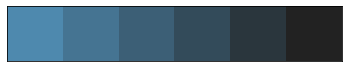

In [5]:
mumbai = sns.dark_palette(custom_colors[0], reverse=True)
sns.palplot(sns.color_palette(mumbai),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

<center style="background: #93C0A4; font-size: 20px; padding: 10px; border: 1px solid lightgray; margin: 10px; width:100px; color:white;">
    Delhi
</center>

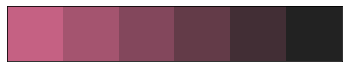

In [6]:
delhi = sns.dark_palette(custom_colors[1], reverse=True)
sns.palplot(sns.color_palette(delhi),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

<center style="background: #93C0A4; font-size: 20px; padding: 10px; border: 1px solid lightgray; margin: 10px; width:100px; color:white;">
    Chennai
</center>

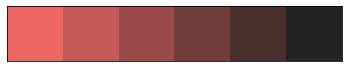

In [7]:
chennai = sns.dark_palette(custom_colors[2], reverse=True)
sns.palplot(sns.color_palette(chennai),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

<center style="background: #93C0A4; font-size: 20px; padding: 10px; border: 1px solid lightgray; margin: 10px; width:150px; color:white;">
    Hyderabad
</center>

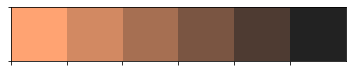

In [8]:
hyderabad = sns.dark_palette(custom_colors[3], reverse=True)
sns.palplot(sns.color_palette(hyderabad),size=1)

<div>  
<h3><center style="background-color:#C39BD3; color:white;"><strong>Loading the dataset and displaying rows ⌛</strong></center></h3>
</div>

In [9]:
df1 = pd.read_csv('../input/housing-prices-in-metropolitan-areas-of-india/Mumbai.csv')
df2 = pd.read_csv('../input/housing-prices-in-metropolitan-areas-of-india/Delhi.csv')
df3 = pd.read_csv('../input/housing-prices-in-metropolitan-areas-of-india/Chennai.csv')
df4 = pd.read_csv('../input/housing-prices-in-metropolitan-areas-of-india/Hyderabad.csv')

In [10]:
df1.head(5)

Price  Area  Location  No. of Bedrooms  Resale  MaintenanceStaff  \
0  4850000   720  Kharghar                1       1                 1   
1  4500000   600  Kharghar                1       1                 1   
2  6700000   650  Kharghar                1       1                 1   
3  4500000   650  Kharghar                1       1                 1   
4  5000000   665  Kharghar                1       1                 1   

   Gymnasium  SwimmingPool  LandscapedGardens  JoggingTrack  ...  \
0          0             0                  0             0  ...   
1          1             1                  0             1  ...   
2          1             1                  0             1  ...   
3          0             0                  1             0  ...   
4          0             0                  1             0  ...   

   LiftAvailable  BED  VaastuCompliant  Microwave  GolfCourse  TV  \
0              1    0                1          0           0   0   
1              1    0                1          0           0   0   
2              1    0                1          0           0   0   
3              1    1                1          0           0   0   
4              1    0                1          0           0   0   

   DiningTable  Sofa  Wardrobe  Refrigerator  
0            0     0         0             0  
1            0     0         0             0  
2            0     0         0             0  
3            0     0         1             0  
4            0     0         0             0  

[5 rows x 40 columns]

In [11]:
df2.head(5)

Price  Area          Location  No. of Bedrooms  Resale  \
0  10500000  1200  Sector 10 Dwarka                2       1   
1   6000000  1000       Uttam Nagar                3       0   
2  15000000  1350      Sarita Vihar                2       1   
3   2500000   435       Uttam Nagar                2       0   
4   5800000   900        Dwarka Mor                3       0   

   MaintenanceStaff  Gymnasium  SwimmingPool  LandscapedGardens  JoggingTrack  \
0                 0          1             0                  0             1   
1                 0          0             0                  0             0   
2                 0          0             0                  0             0   
3                 0          0             0                  0             0   
4                 0          0             0                  0             0   

   ...  LiftAvailable  BED  VaastuCompliant  Microwave  GolfCourse  TV  \
0  ...              1    0                1          0           0   0   
1  ...              0    0                0          0           0   0   
2  ...              0    0                0          0           0   0   
3  ...              0    0                1          0           0   0   
4  ...              1    0                0          0           0   0   

   DiningTable  Sofa  Wardrobe  Refrigerator  
0            0     0         0             0  
1            0     0         0             0  
2            0     0         0             0  
3            0     0         0             0  
4            0     0         0             0  

[5 rows x 40 columns]

In [12]:
df3.head(5)

Price  Area        Location  No. of Bedrooms  Resale  MaintenanceStaff  \
0   5500000  1310   Perungalathur                3       0                 0   
1   5350000  1126      Madhavaram                2       0                 0   
2   8205000  1307      Karapakkam                3       0                 0   
3  23400000  3600  Thiruvidandhai                3       0                 0   
4  10100000  1700  Iyappanthangal                3       0                 0   

   Gymnasium  SwimmingPool  LandscapedGardens  JoggingTrack  ...  \
0          0             0                  0             0  ...   
1          1             1                  1             0  ...   
2          1             1                  1             1  ...   
3          1             1                  0             1  ...   
4          1             1                  1             1  ...   

   LiftAvailable  BED  VaastuCompliant  Microwave  GolfCourse  TV  \
0              0    0                0          0           0   0   
1              1    0                0          0           0   0   
2              0    0                0          0           0   0   
3              0    0                0          0           0   0   
4              0    0                1          0           0   0   

   DiningTable  Sofa  Wardrobe  Refrigerator  
0            0     0         0             0  
1            0     0         0             0  
2            0     0         0             0  
3            0     0         0             0  
4            0     0         0             0  

[5 rows x 40 columns]

In [13]:
df4.head(5)

Price  Area     Location  No. of Bedrooms  Resale  MaintenanceStaff  \
0   6968000  1340     Nizampet                2       0                 0   
1  29000000  3498  Hitech City                4       0                 0   
2   6590000  1318    Manikonda                2       0                 0   
3   5739000  1295        Alwal                3       1                 0   
4   5679000  1145   Kukatpally                2       0                 0   

   Gymnasium  SwimmingPool  LandscapedGardens  JoggingTrack  ...  \
0          1             1                  1             1  ...   
1          1             1                  1             1  ...   
2          1             0                  0             0  ...   
3          0             0                  0             0  ...   
4          0             0                  1             0  ...   

   LiftAvailable  BED  VaastuCompliant  Microwave  GolfCourse  TV  \
0              1    0                1          0           0   0   
1              1    0                1          0           0   0   
2              0    0                0          0           0   0   
3              1    0                0          0           0   0   
4              1    0                0          0           0   0   

   DiningTable  Sofa  Wardrobe  Refrigerator  
0            0     0         0             0  
1            0     0         0             0  
2            0     0         0             0  
3            0     0         0             0  
4            0     0         0             0  

[5 rows x 40 columns]

<div class="alert alert-warning">
<p>📌 Since for a set of houses, nothing was mentioned about certain amenities, '9' was used to mark such values, which could indicate the absence of information about the apartment but these values don't ascertain the absence of such a feature in real life.<br><br>
We will be dropping these values so that they don't cloud our analysis.
</p>
</div>

In [14]:
df1.replace(9, np.nan, inplace=True)
df2.replace(9, np.nan, inplace=True)
df3.replace(9, np.nan, inplace=True)
df4.replace(9, np.nan, inplace=True)

In [15]:
df1 = df1.dropna()
df2 = df2.dropna()
df3 = df3.dropna()
df4 = df4.dropna()

<div>  
<h3><center style="background-color:#C39BD3; color:white;"><strong>Dataframe shape after dropping values</strong></center></h3>
</div>

In [16]:
print(f"{y_}Mumbai:{r_}{df1.shape}\n")
print(f"{y_}Delhi:{r_}{df2.shape}\n")
print(f"{y_}Chennai:{r_}{df3.shape}\n")
print(f"{y_}Hyderabad:{r_}{df4.shape}\n")

Mumbai:(1398, 40)

Delhi:(2002, 40)

Chennai:(2233, 40)

Hyderabad:(2434, 40)



In [17]:
print(f"{y_}Data types of data columns: \n{m_}{df1.dtypes}")

Data types of data columns: 
Price                    int64
Area                     int64
Location                object
No. of Bedrooms          int64
Resale                   int64
MaintenanceStaff       float64
Gymnasium              float64
SwimmingPool           float64
LandscapedGardens      float64
JoggingTrack           float64
RainWaterHarvesting    float64
IndoorGames            float64
ShoppingMall           float64
Intercom               float64
SportsFacility         float64
ATM                    float64
ClubHouse              float64
School                 float64
24X7Security           float64
PowerBackup            float64
CarParking             float64
StaffQuarter           float64
Cafeteria              float64
MultipurposeRoom       float64
Hospital               float64
WashingMachine         float64
Gasconnection          float64
AC                     float64
Wifi                   float64
Children'splayarea     float64
LiftAvailable          float64
BED       

<div class="alert alert-warning">
<p>Modifying price to price in lakhs(INR)
</p>
</div>

In [18]:
df1['Price'] = df1['Price']/100000
df2['Price'] = df1['Price']/100000
df3['Price'] = df1['Price']/100000
df4['Price'] = df1['Price']/100000

<div>  
<h3><center style="background-color:#C39BD3; color:white;"><strong>Feature generation: latitude and longitude 🌐</strong></center></h3>
</div>

In [19]:
geolocator = Nominatim(user_agent="Ruch")

def feature_generation(df):
    lat=[]
    long=[]
    a=0
    for i in df['Location']: 
        location = geolocator.geocode(i)
        try:
            lat.append(location.latitude)
            long.append(location.longitude)
            print(a)
        except:
            lat.append("NA")
            long.append("NA")
        a=a+1
    df['Latitude'] = lat
    df['Longitude'] = long

In [20]:
# feature_generation(df1)
# feature_generation(df2)
# feature_generation(df3)
# feature_generation(df4)

In [21]:
# df1.to_csv('/kaggle/working/Mumbai_updated.csv')
# df2.to_csv('/kaggle/working/Delhi_updated.csv')
# df3.to_csv('/kaggle/working/Chennai_updated.csv')
# df4.to_csv('/kaggle/working/Hyderabad_updated.csv')

In [22]:
df1 = pd.read_csv('../input/intermediate-notebooks-data/Mumbai_updated.csv')
df2 = pd.read_csv('../input/intermediate-notebooks-data/Delhi_updated.csv')
df3 = pd.read_csv('../input/intermediate-notebooks-data/Chennai_updated.csv')
df4 = pd.read_csv('../input/intermediate-notebooks-data/Hyderabad_updated.csv')

In [23]:
df1.head(5)

Unnamed: 0  Price  Area  Location  No. of Bedrooms  Resale  \
0           0   48.5   720  Kharghar                1       1   
1           1   45.0   600  Kharghar                1       1   
2           2   67.0   650  Kharghar                1       1   
3           3   45.0   650  Kharghar                1       1   
4           4   50.0   665  Kharghar                1       1   

   MaintenanceStaff  Gymnasium  SwimmingPool  LandscapedGardens  ...  \
0               1.0        0.0           0.0                0.0  ...   
1               1.0        1.0           1.0                0.0  ...   
2               1.0        1.0           1.0                0.0  ...   
3               1.0        0.0           0.0                1.0  ...   
4               1.0        0.0           0.0                1.0  ...   

   VaastuCompliant  Microwave  GolfCourse   TV  DiningTable  Sofa  Wardrobe  \
0              1.0        0.0         0.0  0.0          0.0   0.0       0.0   
1              1.0        0.0         0.0  0.0          0.0   0.0       0.0   
2              1.0        0.0         0.0  0.0          0.0   0.0       0.0   
3              1.0        0.0         0.0  0.0          0.0   0.0       1.0   
4              1.0        0.0         0.0  0.0          0.0   0.0       0.0   

   Refrigerator  Latitude  Longitude  
0           0.0  19.05253  73.073511  
1           0.0  19.05253  73.073511  
2           0.0  19.05253  73.073511  
3           0.0  19.05253  73.073511  
4           0.0  19.05253  73.073511  

[5 rows x 43 columns]

In [24]:
df1 = df1.drop(['Unnamed: 0'], axis = 1) 
df2 = df2.drop(['Unnamed: 0'], axis = 1) 
df3 = df3.drop(['Unnamed: 0'], axis = 1) 
df4 = df4.drop(['Unnamed: 0'], axis = 1) 

<div>  
<h3><center style="background-color:#C39BD3; color:white;"><strong>EDA 📊</strong></center></h3>
</div>

In [25]:
sns.set_style("whitegrid")

In [26]:
def triple_plot(x, title,c):
    fig, ax = plt.subplots(3,1,figsize=(20,10),sharex=True)
    sns.distplot(x, ax=ax[0],color=c)
    ax[0].set(xlabel=None)
    ax[0].set_title('Histogram + KDE')
    sns.boxplot(x, ax=ax[1],color=c)
    ax[1].set(xlabel=None)
    ax[1].set_title('Boxplot')
    sns.violinplot(x, ax=ax[2],color=c)
    ax[2].set(xlabel=None)
    ax[2].set_title('Violin plot')
    fig.suptitle(title, fontsize=16)
    plt.tight_layout(pad=3.0)
    plt.show()

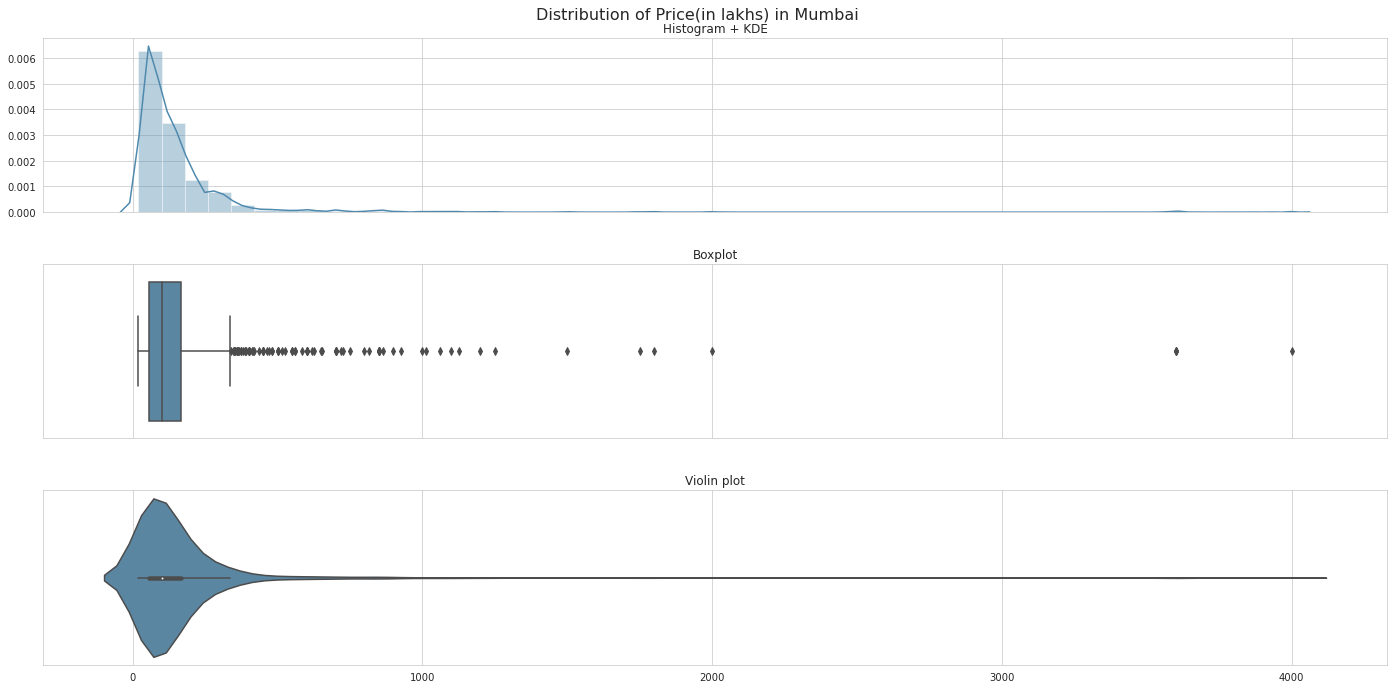

In [27]:
triple_plot(df1['Price'],'Distribution of Price(in lakhs) in Mumbai',custom_colors[0])

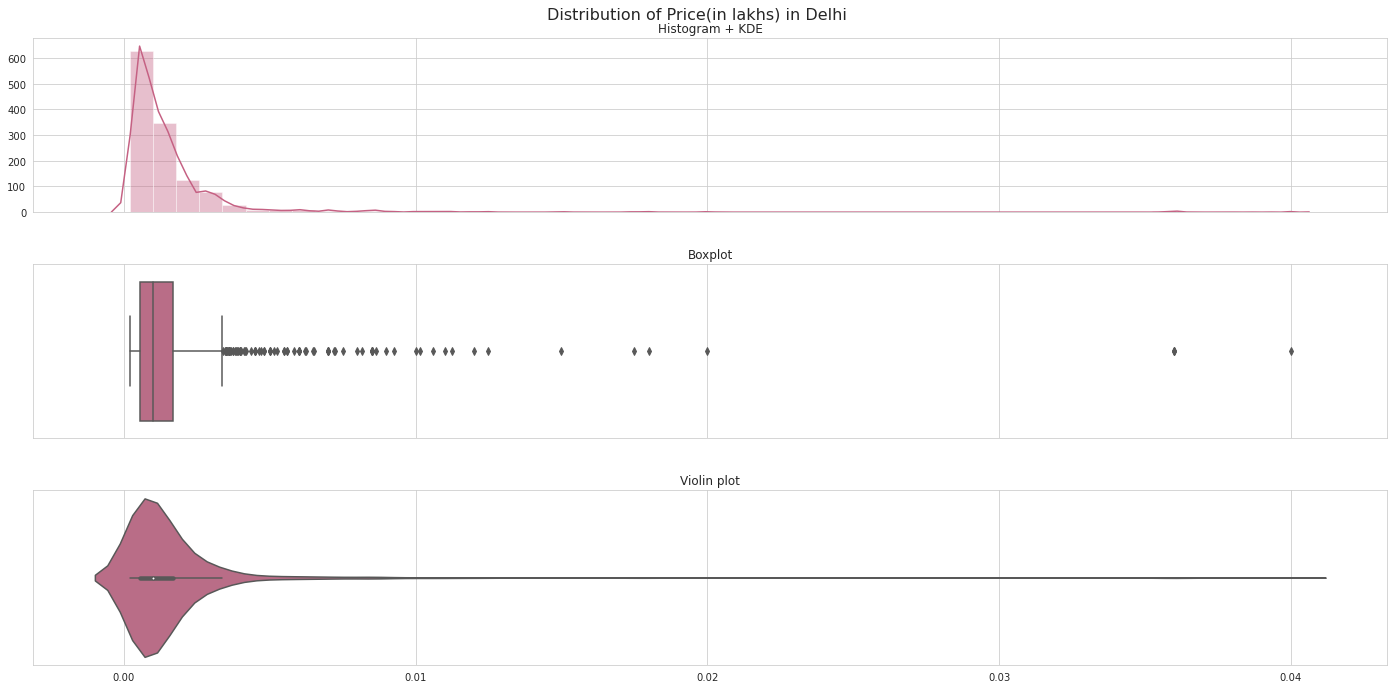

In [28]:
triple_plot(df2['Price'],'Distribution of Price(in lakhs) in Delhi',custom_colors[1])

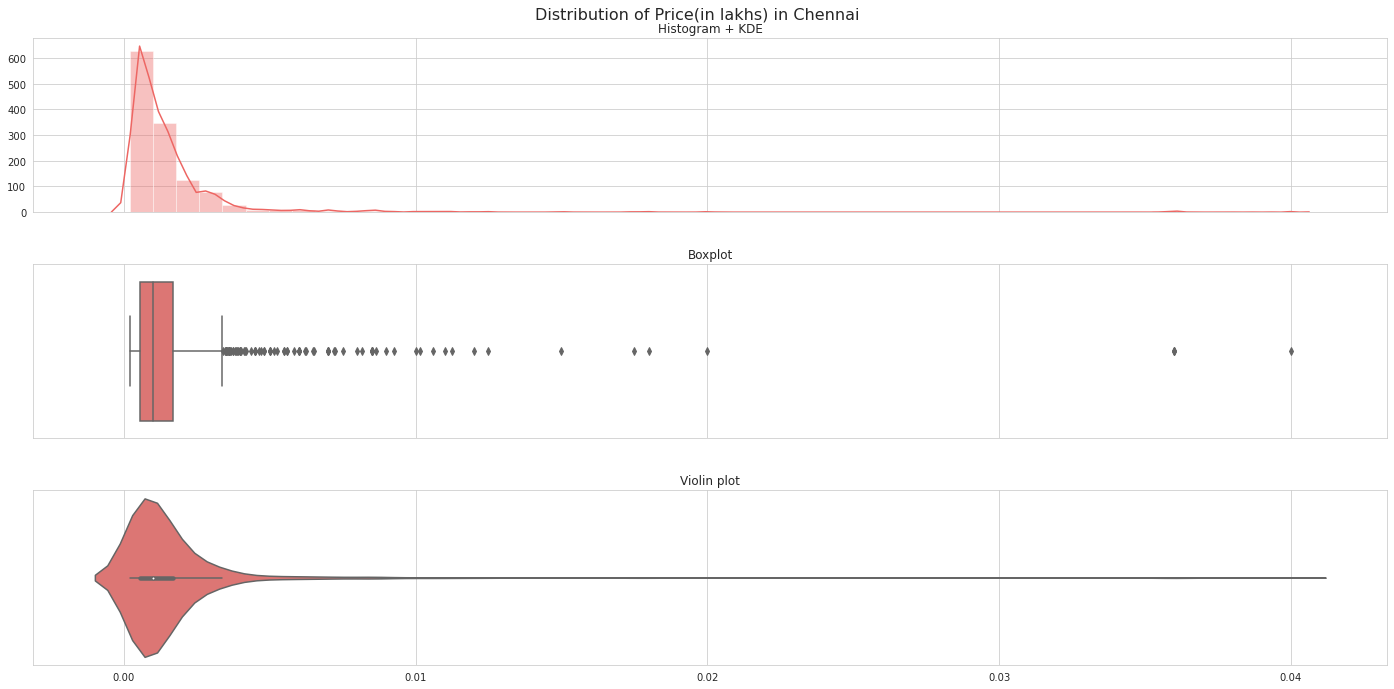

In [29]:
triple_plot(df3['Price'],'Distribution of Price(in lakhs) in Chennai',custom_colors[2])

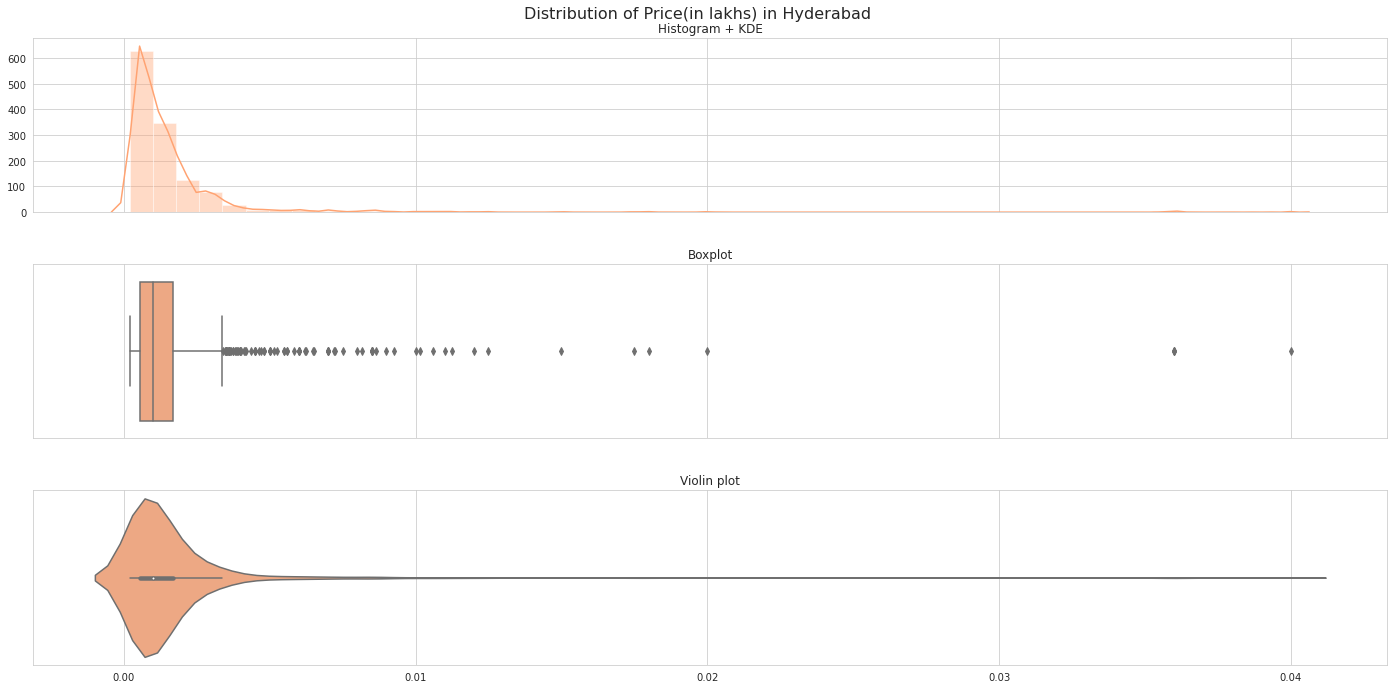

In [30]:
triple_plot(df4['Price'],'Distribution of Price(in lakhs) in Hyderabad',custom_colors[3])

In [31]:
def count_plot(data,title,p):
    df5=data[data['Resale']== 0]
    df6=data[data['Resale']== 1]
    fig, ax = plt.subplots(1,2,figsize=(15, 10))
    ax[0]=sns.countplot(y='Location', data=df5, order=df5.Location.value_counts().index[:10],ax=ax[0],palette = p)
    ax[0].set_title('Number of New Properties')
    ax[1]=sns.countplot(y='Location', data=df6, order=df6.Location.value_counts().index[:10],ax=ax[1],palette = p)
    ax[1].set_title('Number of Resale Properties')   
    
    fig.suptitle(title, fontsize=16)
    plt.tight_layout(pad=3.0)
    plt.show()

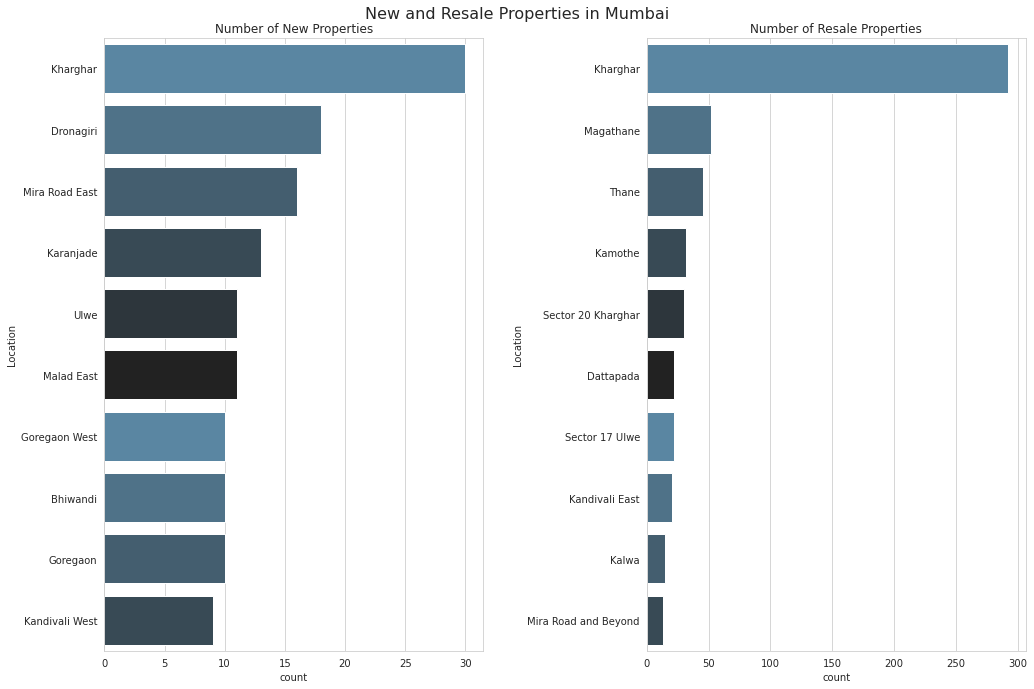

In [32]:
count_plot(df1,'New and Resale Properties in Mumbai',mumbai)

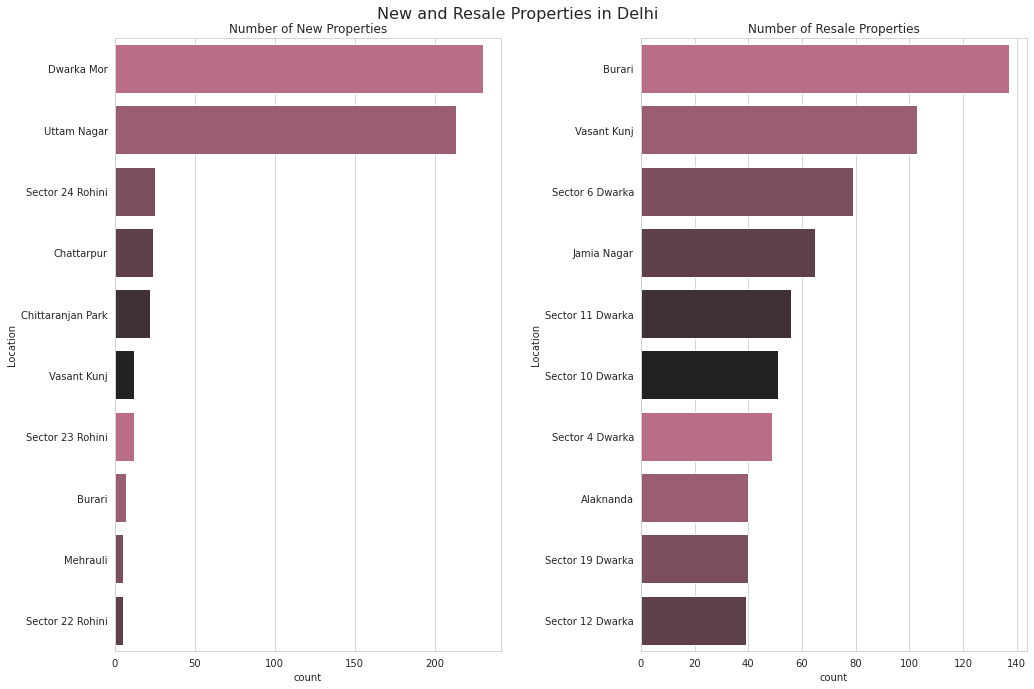

In [33]:
count_plot(df2,'New and Resale Properties in Delhi',delhi)

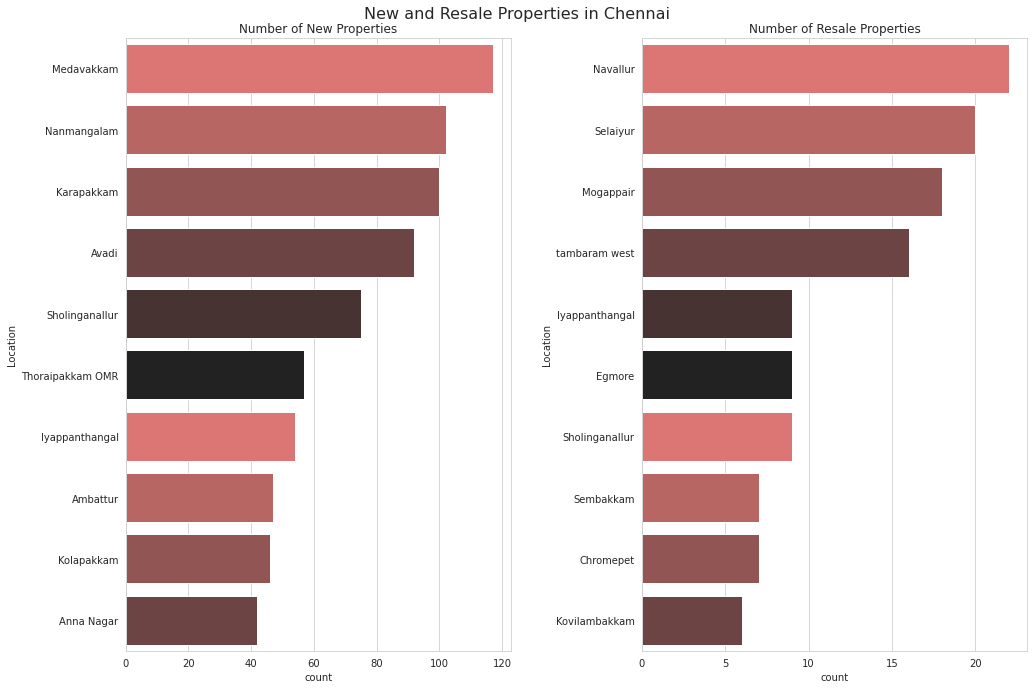

In [34]:
count_plot(df3,'New and Resale Properties in Chennai',chennai)

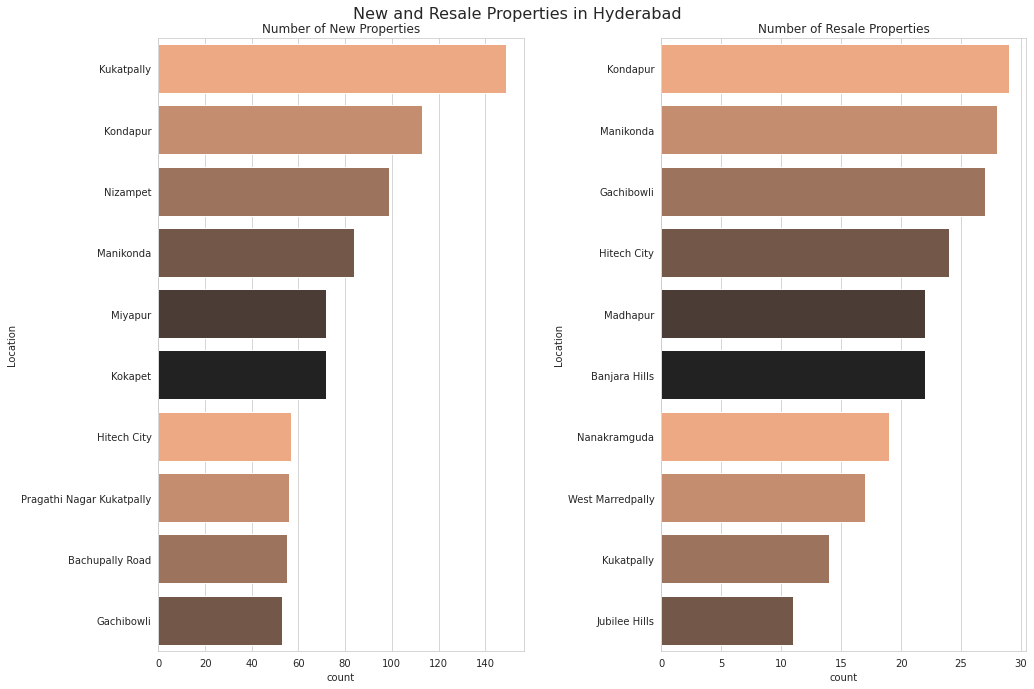

In [35]:
count_plot(df4,'New and Resale Properties in Hyderabad',hyderabad)

In [36]:
def cat_plot(data,title,p):
    sns.catplot(x="No. of Bedrooms", y="Price", data=data,palette = p)
    plt.title('No. of Bedrooms vs Price in '+ title,size=16)
    plt.gcf().set_size_inches(6,8)
    plt.show()

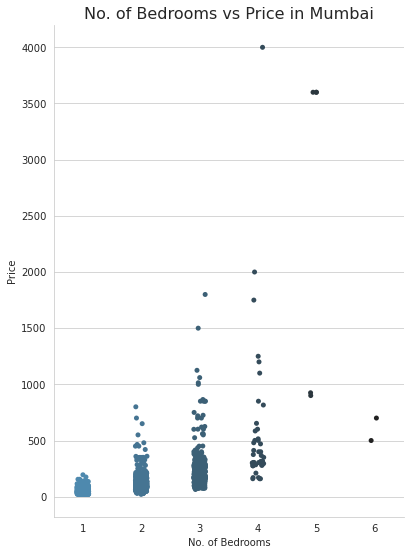

In [37]:
cat_plot(df1,'Mumbai',mumbai)

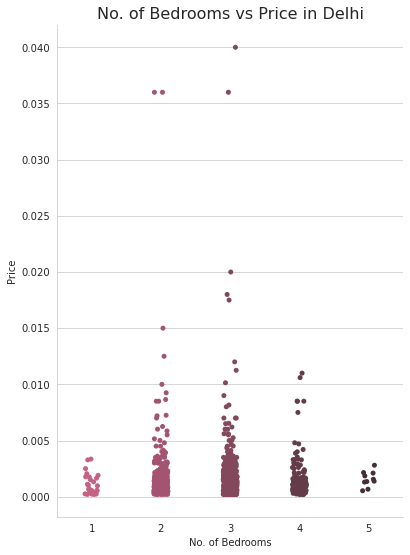

In [38]:
cat_plot(df2,'Delhi',delhi)

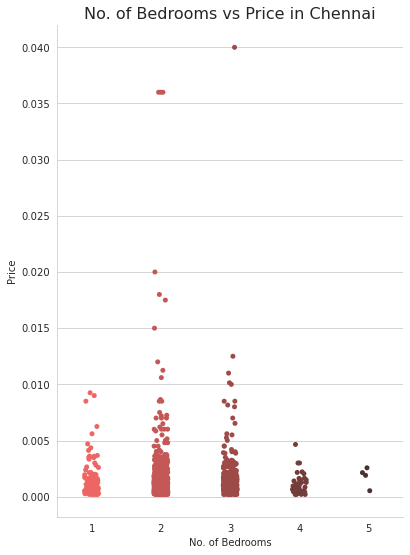

In [39]:
cat_plot(df3,'Chennai',chennai)

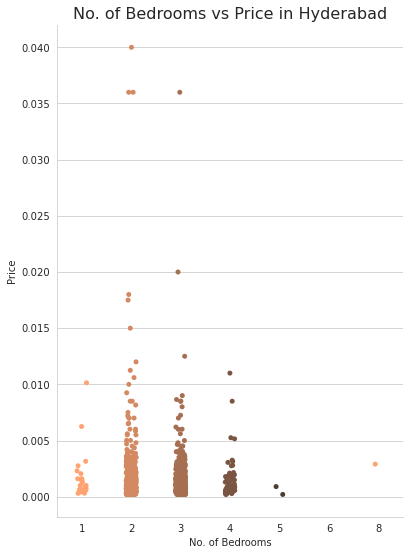

In [40]:
cat_plot(df4,'Hyderabad',hyderabad)

In [41]:
def scatter_plot(data,title,c):
    sns.scatterplot(x="Area", y="Price", data=data,color=c,marker="P")
    plt.title('Area in square feet vs Price in '+ title,size=16)
    plt.gcf().set_size_inches(6,8)
    plt.show()

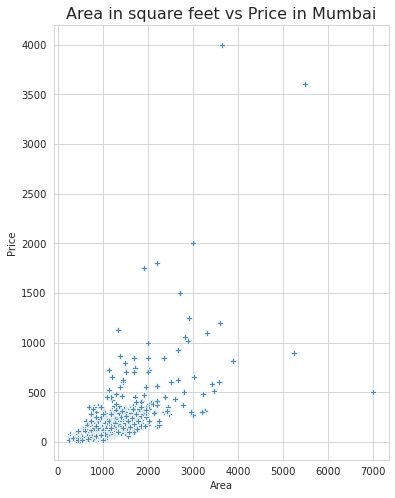

In [42]:
scatter_plot(df1,'Mumbai',custom_colors[0])

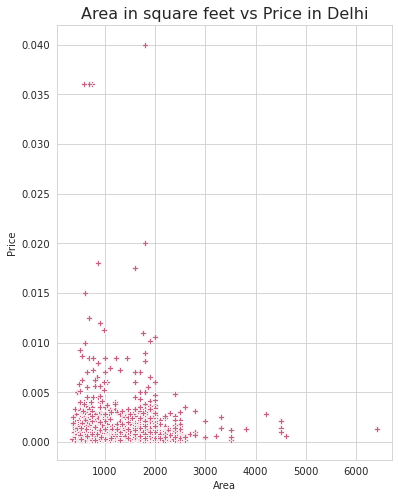

In [43]:
scatter_plot(df2,'Delhi',custom_colors[1])

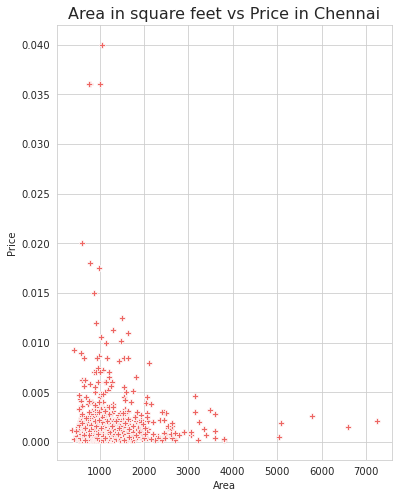

In [44]:
scatter_plot(df3,'Chennai',custom_colors[2])

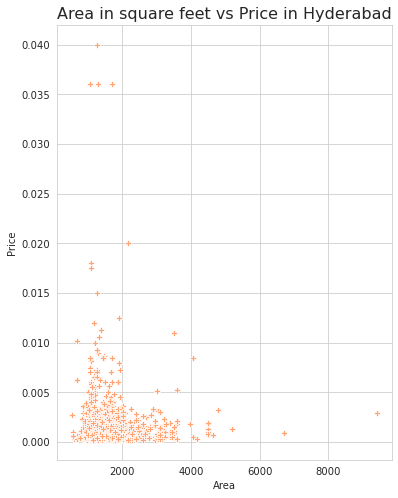

In [45]:
scatter_plot(df4,'Hyderabad',custom_colors[3])

In [46]:
frames = [df1,df2,df3,df4]
merged = pd.concat(frames)
merged = merged.loc[:, ~merged.columns.str.contains('^Unnamed')]

In [47]:
def preprocess(df) :
    df = df[['Location','Latitude','Longitude','Price']]
    df = df.replace('NA', np.nan)
    df.dropna(subset=['Latitude'], inplace=True)
    df.dropna(subset=['Price'], inplace=True)
    df["Latitude"] = df["Latitude"].astype(float)
    df["Longitude"] = df["Longitude"].astype(float)
    return df

In [48]:
map1_df = preprocess(df1)
map2_df = preprocess(df2)
map3_df = preprocess(df3)
map4_df = preprocess(df4)

<div>  
<h3><center style="background-color:#C39BD3; color:white;"><strong>House locations 🗺️</strong></center></h3>
</div>

<div>
<img src="https://i.imgur.com/bUJos0Ul.jpg" width="350" height="350"/>
</div>

In [49]:
city_map = folium.Map(location=[19.08,72.74], zoom_start=11.2, tiles='Stamen Terrain')
mc = MarkerCluster()
for idx, row in map1_df.iterrows():
    if not math.isnan(row['Longitude']) and not math.isnan(row['Latitude']):
        popup = """
        Location : <b>%s</b><br>
        Price : <b>%s</b><br>
        """ % (row['Location'], row['Price'])
        mc.add_child(Marker([row['Latitude'], row['Longitude']],tooltip=popup))
    city_map.add_child(mc)
city_map

<div>
<img src="https://i.imgur.com/F2eFcsf.png" width="350" height="350"/>
</div>

In [50]:
city_map = folium.Map(location=[28.69,76.95], zoom_start=10, tiles='Stamen Terrain')
mc = MarkerCluster()
for idx, row in map2_df.iterrows():
    if not math.isnan(row['Longitude']) and not math.isnan(row['Latitude']):
        popup = """
        Location : <b>%s</b><br>
        Price : <b>%s</b><br>
        """ % (row['Location'], row['Price'])
        mc.add_child(Marker([row['Latitude'], row['Longitude']],tooltip=popup))
    city_map.add_child(mc)
city_map

<div>
<img src="https://i.imgur.com/E2rku1K.png" width="350" height="350"/>
</div>

In [51]:
city_map = folium.Map(location=[13.04,80], zoom_start=10.5, tiles='Stamen Terrain')
mc = MarkerCluster()
for idx, row in map3_df.iterrows():
    if not math.isnan(row['Longitude']) and not math.isnan(row['Latitude']):
        popup = """
        Location : <b>%s</b><br>
        Price : <b>%s</b><br>
        """ % (row['Location'], row['Price'])
        mc.add_child(Marker([row['Latitude'], row['Longitude']],tooltip=popup))
    city_map.add_child(mc)
city_map

<div>
<img src="https://i.imgur.com/PFS3PJv.png" width="350" height="350"/>
</div>

In [52]:
city_map = folium.Map(location=[17.4,78.2], zoom_start=10, tiles='Stamen Terrain')
mc = MarkerCluster()
for idx, row in map4_df.iterrows():
    if not math.isnan(row['Longitude']) and not math.isnan(row['Latitude']):
        popup = """
        Location : <b>%s</b><br>
        Price : <b>%s</b><br>
        """ % (row['Location'], row['Price'])
        mc.add_child(Marker([row['Latitude'], row['Longitude']],tooltip=popup))
    city_map.add_child(mc)
city_map

<div>  
<h3><center style="background-color:#C39BD3; color:white;"><strong>Amenities</strong></center></h3>
</div>

In [53]:
c1 = ["#4e89ae","#BFD5E2"]
c2 = ["#c56183","#E6BCCA"]
c3 = ["#ed6663","#F7BDBC"]
c4 = ["#ffa372","#FFDECC"]

In [54]:
def pie_chart(df,link,c,addAll = True):
    df = df.iloc [:,5:-2] 
    fig = go.Figure()
    for column in df.columns.to_list():
        val = df[column].value_counts().rename_axis('unique_values').reset_index(name='val_count')
        labels = val['unique_values']
        values = val['val_count']
        fig.add_trace(
            go.Pie(
                labels=labels, 
                values=values,
                marker_colors=c
            )
        )
        button_all = dict(label = 'All',
                      method = 'update',
                      args = [{'visible': df.columns.isin(df.columns),
                               'title': 'All',
                               'showlegend':True}])


    def create_layout_button(column):
        return dict(label = column,
                    method = 'update',
                    args = [{'visible': df.columns.isin([column]),
                             'title': column,
                             'showlegend': True}])
    fig.add_layout_image(
    dict(
        source=link,
        xref="paper", yref="paper",
        x=0.5, y=0.95,
        sizex=0.9, sizey=0.6,
        xanchor="center", yanchor="bottom"
    )
    )
    fig.update_layout(
        updatemenus=[go.layout.Updatemenu(
            active = 0,
            buttons = ([button_all] * addAll) + list(df.columns.map(lambda column: create_layout_button(column)))
            )
        ])
    
    fig.show()

In [55]:
pie_chart(df1,"https://i.imgur.com/OEr0Lw2.png",c1)

In [56]:
pie_chart(df2,"https://i.imgur.com/Byi2BQE.png",c2)

In [57]:
pie_chart(df3,"https://i.imgur.com/8Yxjfhx.png",c3)

In [58]:
pie_chart(df4,"https://i.imgur.com/KXYLDQV.png",c4)

<div>  
<h3><center style="background-color:#C39BD3; color:white;"><strong>Correlation</strong></center></h3>
</div>

In [59]:
merged.columns
merged = merged.rename(columns={"Children'splayarea": "ChildrenPlayArea"})
merged = merged.dropna()

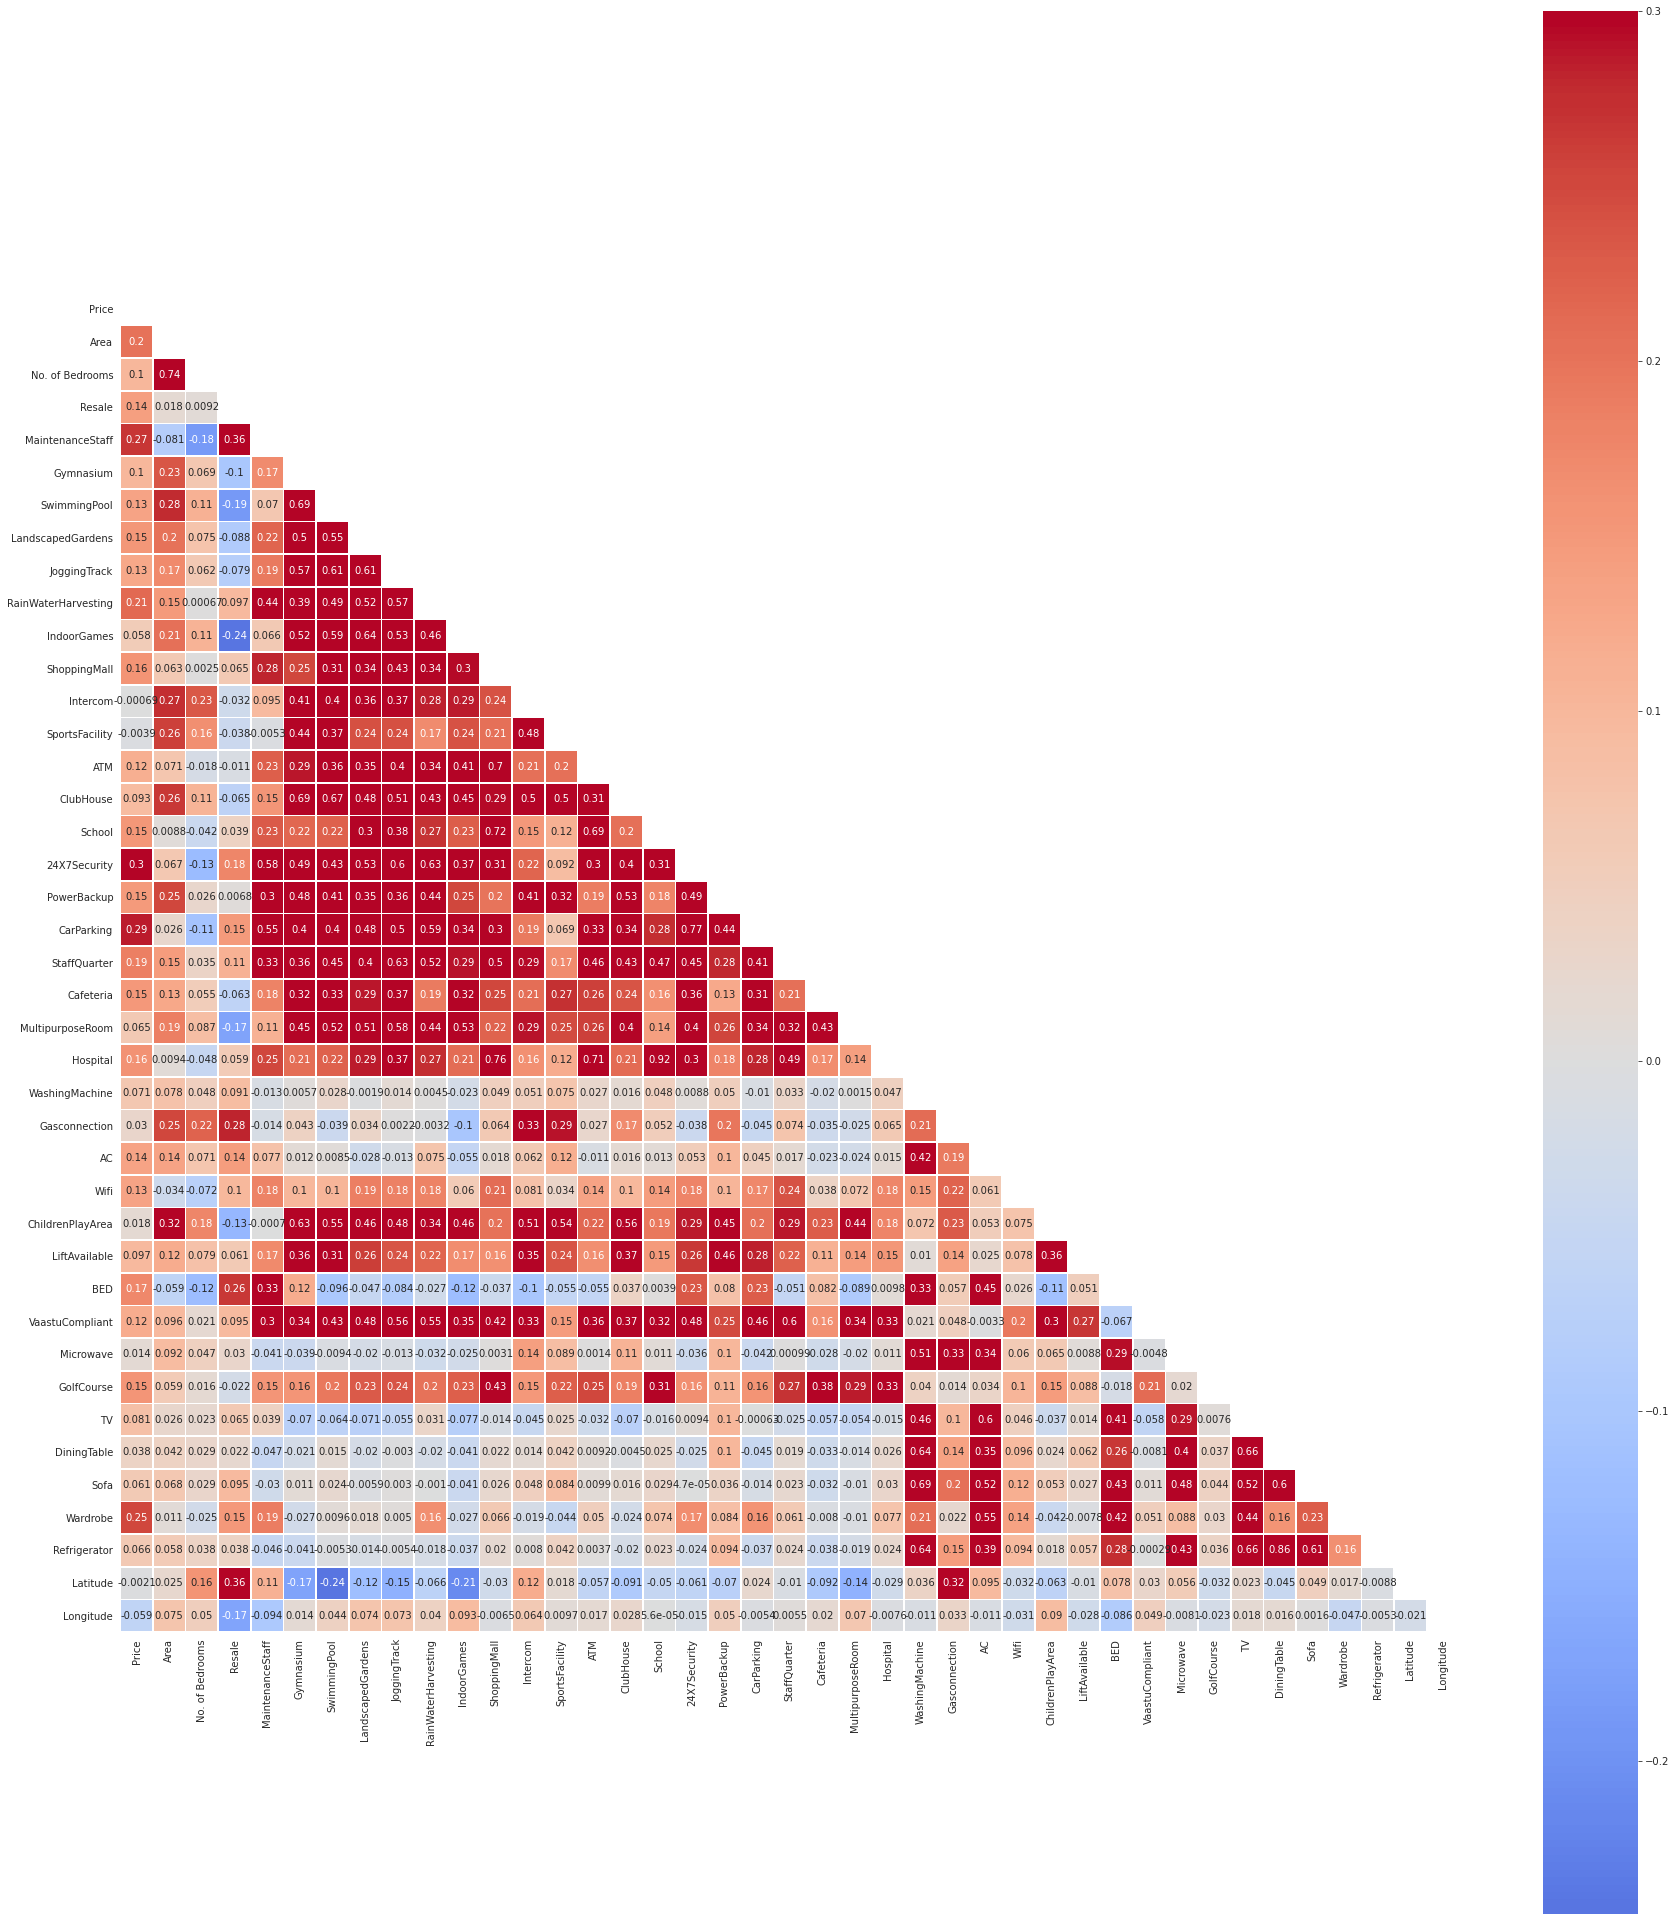

In [60]:
plt.figure(figsize=(30,35))
corr=merged.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(merged.corr(), mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5,annot=True)
plt.show()

In [61]:
indices = corr.index.values
cor_matrix = np.asmatrix(corr)
G = nx.from_numpy_matrix(cor_matrix)
G = nx.relabel_nodes(G,lambda x: indices[x])
G.edges(data=True)

EdgeDataView([('Price', 'Price', {'weight': 1.0}), ('Price', 'Area', {'weight': 0.2013644145246771}), ('Price', 'No. of Bedrooms', {'weight': 0.1024292874377942}), ('Price', 'Resale', {'weight': 0.14253692159779383}), ('Price', 'MaintenanceStaff', {'weight': 0.2672453784928494}), ('Price', 'Gymnasium', {'weight': 0.10232178162218092}), ('Price', 'SwimmingPool', {'weight': 0.13237043536200083}), ('Price', 'LandscapedGardens', {'weight': 0.15210450385480623}), ('Price', 'JoggingTrack', {'weight': 0.12619333711545047}), ('Price', 'RainWaterHarvesting', {'weight': 0.21419076062783496}), ('Price', 'IndoorGames', {'weight': 0.057747417555888914}), ('Price', 'ShoppingMall', {'weight': 0.15646257280142614}), ('Price', 'Intercom', {'weight': -0.0006934146379450964}), ('Price', 'SportsFacility', {'weight': -0.003941663241047686}), ('Price', 'ATM', {'weight': 0.11540209181539313}), ('Price', 'ClubHouse', {'weight': 0.09326381820107565}), ('Price', 'School', {'weight': 0.15168356976161138}), ('Pri

In [62]:
def corr_network(G, corr_direction, min_correlation):
    H = G.copy()

    for s1, s2, weight in G.edges(data=True):       
        if corr_direction == "positive":
            if weight["weight"] < 0 or weight["weight"] < min_correlation:
                H.remove_edge(s1, s2)
        else:
            if weight["weight"] >= 0 or weight["weight"] > min_correlation:
                H.remove_edge(s1, s2)
                
    edges,weights = zip(*nx.get_edge_attributes(H,'weight').items())
    
    weights = tuple([(1+abs(x))**2 for x in weights])
   
    d = dict(nx.degree(H))
    nodelist=d.keys()
    node_sizes=d.values()
    
    positions=nx.circular_layout(H)
    
    plt.figure(figsize=(15,15))

    nx.draw_networkx_nodes(H,positions,node_color='#d100d1',nodelist=nodelist,
                       node_size=tuple([x**3 for x in node_sizes]),alpha=0.8)

    nx.draw_networkx_labels(H, positions, font_size=8)

    if corr_direction == "positive":
        edge_colour = plt.cm.summer 
    else:
        edge_colour = plt.cm.autumn
        
    nx.draw_networkx_edges(H, positions, edgelist=edges,style='solid',
                          width=weights, edge_color = weights, edge_cmap = edge_colour,
                          edge_vmin = min(weights), edge_vmax=max(weights))
    plt.axis('off')
    plt.show() 

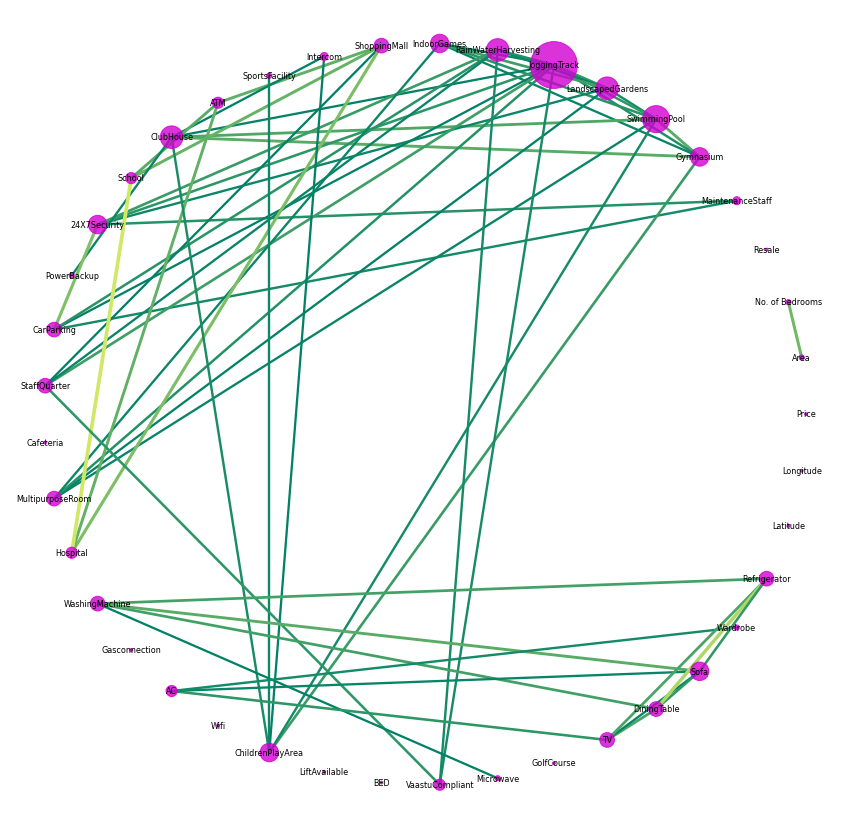

In [63]:
corr_network(G, corr_direction="positive",min_correlation = 0.5)

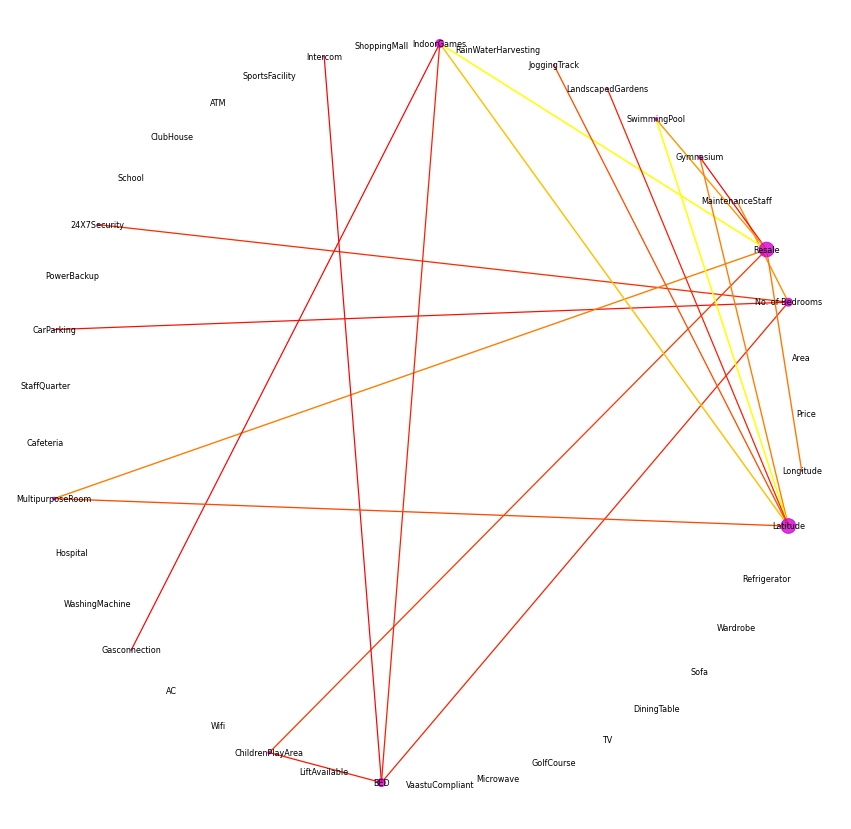

In [64]:
corr_network(G, corr_direction="negative",min_correlation = -0.1)

<div>  
<h3><center style="background-color:#C39BD3; color:white;"><strong>Permutation Importance</strong></center></h3>
</div>

In [65]:
feature_names = ['Area','No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'ChildrenPlayArea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator', 'Latitude',
       'Longitude']

X = merged[feature_names]
y = merged['Price']

In [66]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
model = RandomForestRegressor().fit(train_X, train_y)

In [67]:
perm = PermutationImportance(model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

<div class="alert alert-warning">
<p> Longitude is the most important feature. <br> Understandably, the area of the house plays a major role in the final price too.
</p>
</div>

<div>  
<h3><center style="background-color:#C39BD3; color:white;"><strong>Partial plots</strong></center></h3>
</div>

In [68]:
model2 = DecisionTreeRegressor(random_state=0, max_depth=5, min_samples_split=5).fit(train_X, train_y)

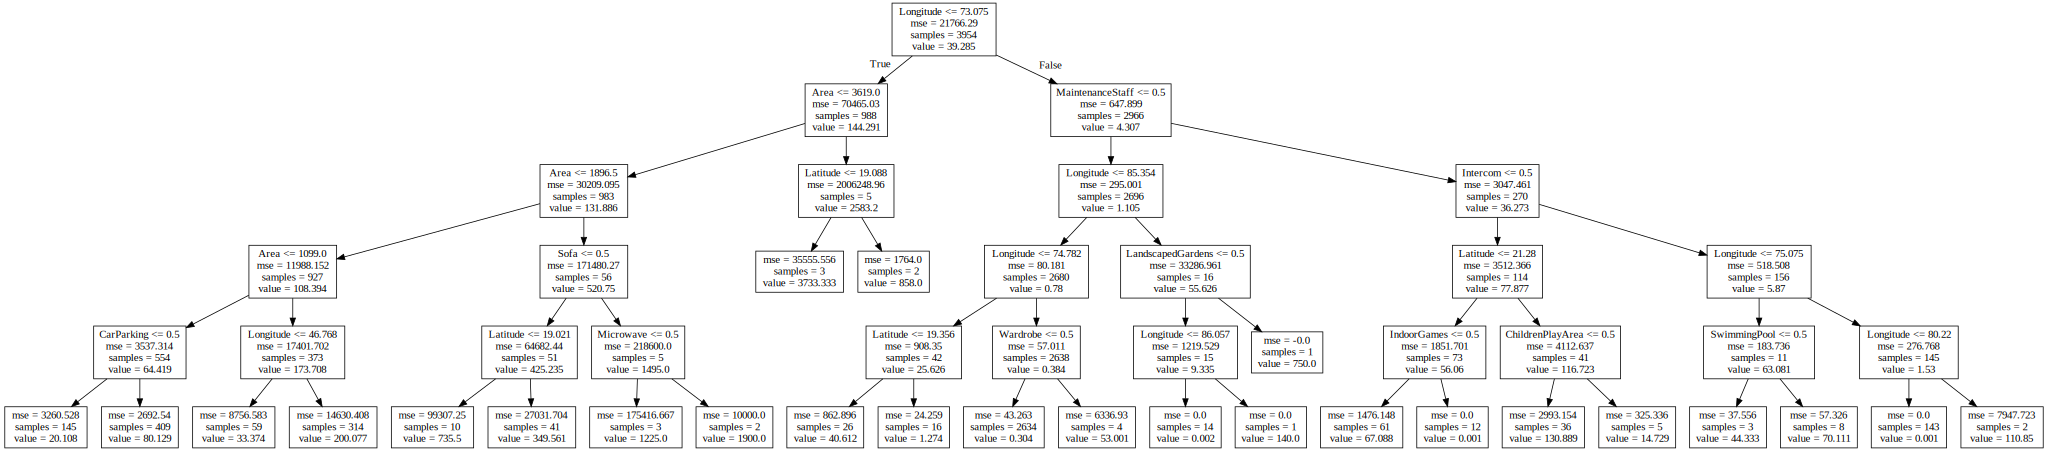

In [69]:
tree_graph = tree.export_graphviz(model2, out_file=None, feature_names=feature_names)
graphviz.Source(tree_graph)

<div class="alert alert-warning">
<p>The leaves indicate the splitting criteria. <br> The branches represent True or False values.
</p>
</div>

<div class="alert alert-success">
<p>Interaction between Longitude coordinates of a house and the Area of the house
</p>
</div>

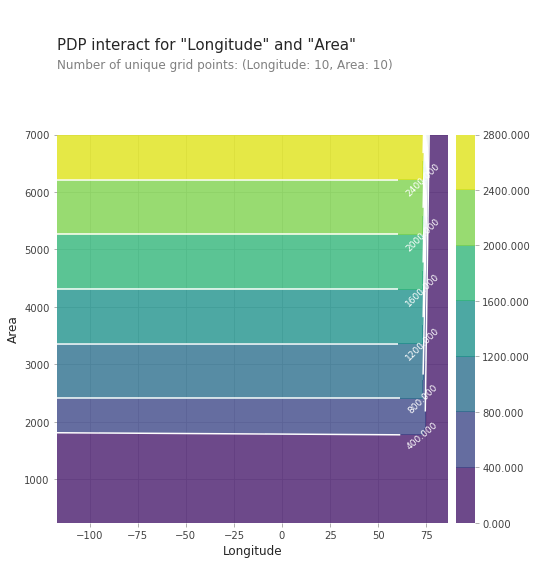

In [70]:
features_to_plot = ['Longitude', 'Area']
inter1  =  pdp.pdp_interact(model=model2, dataset=val_X, model_features=feature_names, features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

<div>  
<h3><center style="background-color:#C39BD3; color:white;"><strong>Feature Importance</strong></center></h3>
</div>

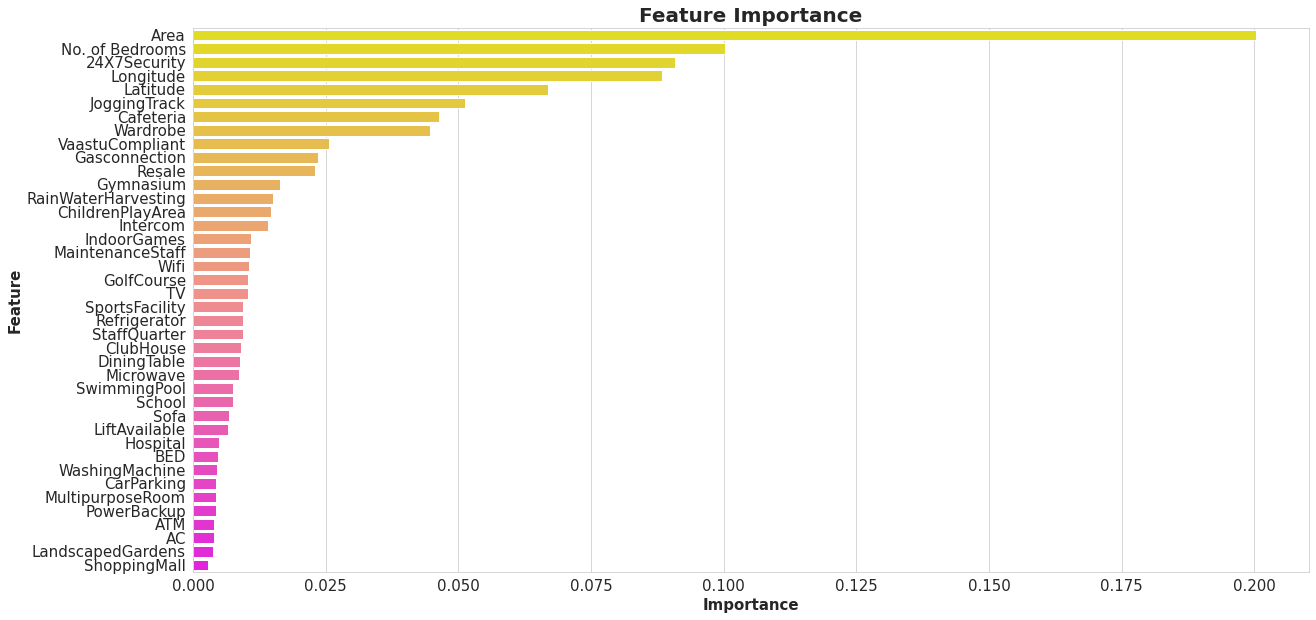

In [71]:
model3 = ExtraTreesRegressor()
model3.fit(train_X, train_y)
fi = pd.DataFrame(model3.feature_importances_,
             columns=['importance'])
fi['feature'] = feature_names
fi = fi.sort_values('importance', ascending=False)

plt.figure(figsize=(20, 10))
ax = sns.barplot(data=fi, x='importance', y='feature',
                 palette="spring_r")
ax.tick_params(axis='both', which='both', labelsize=15)
ax.set_xlabel('Importance',fontsize=15, weight="bold");
ax.set_ylabel('Feature',fontsize=15,weight="bold");
plt.title("Feature Importance", size=20, weight="bold");

<div>  
<h3><center style="background-color:#C39BD3; color:white;"><strong>Model Training ⚙️ </strong></center></h3>
</div>

In [72]:
feature_names = ['Area','No. of Bedrooms','MaintenanceStaff','24X7Security','Latitude','Longitude']

X = merged[feature_names]
y = merged['Price']

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [73]:
def train_model(m,name):
    model = m
    model.fit(X=train_X, y=train_y)
    predictions = model.predict(val_X)
    mae = mean_absolute_error(val_y, predictions)
    r2 = r2_score(val_y, predictions)
    print("{0} mae {1} r2 {2}".format(name,mae,r2))

train_model(DecisionTreeRegressor(),"Decision Tree Regressor")
train_model(RandomForestRegressor(),"Random Forest Regressor")   
train_model(XGBRegressor(n_estimators=600),"XGBoost Regressor")   

Decision Tree Regressor mae 13.091957973676447 r2 0.2364013544204464
Random Forest Regressor mae 11.094208304285635 r2 0.6001675450512561
XGBoost Regressor mae 9.641868255370206 r2 0.8215690323569549


References:
* [NetworkX documentation](https://networkx.org/documentation/stable/tutorial.html)
* [Visualising stocks correlations with Networkx](https://towardsdatascience.com/visualising-stocks-correlations-with-networkx-88f2ee25362e)


<div>
    <img src="https://i.imgur.com/pl3FhXV.png">
</div>